# Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_gender = pd.read_csv("gender_submission.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

# Questions ?

Dans ce défi, nous devons construire un modèle prédictif qui répond à la question: 

«Quels types de personnes étaient plus susceptibles de survivre?» 

en utilisant les données sur les passagers (c'est-à-dire nom, âge, sexe, classe socio-économique, etc.).

ils étaient 1502 passagers mort sur 2224 parmis les quels il y a aussi d'autres passagers qui étaient moins succeptibles de survivre que d'autres.

Notre travail est donc de prédire si un passager a survécu au naufrage du Titanic ou non.
Pour chaque élément de l'ensemble de test, vous devez prédire une valeur 0 ou 1 pour la variable.

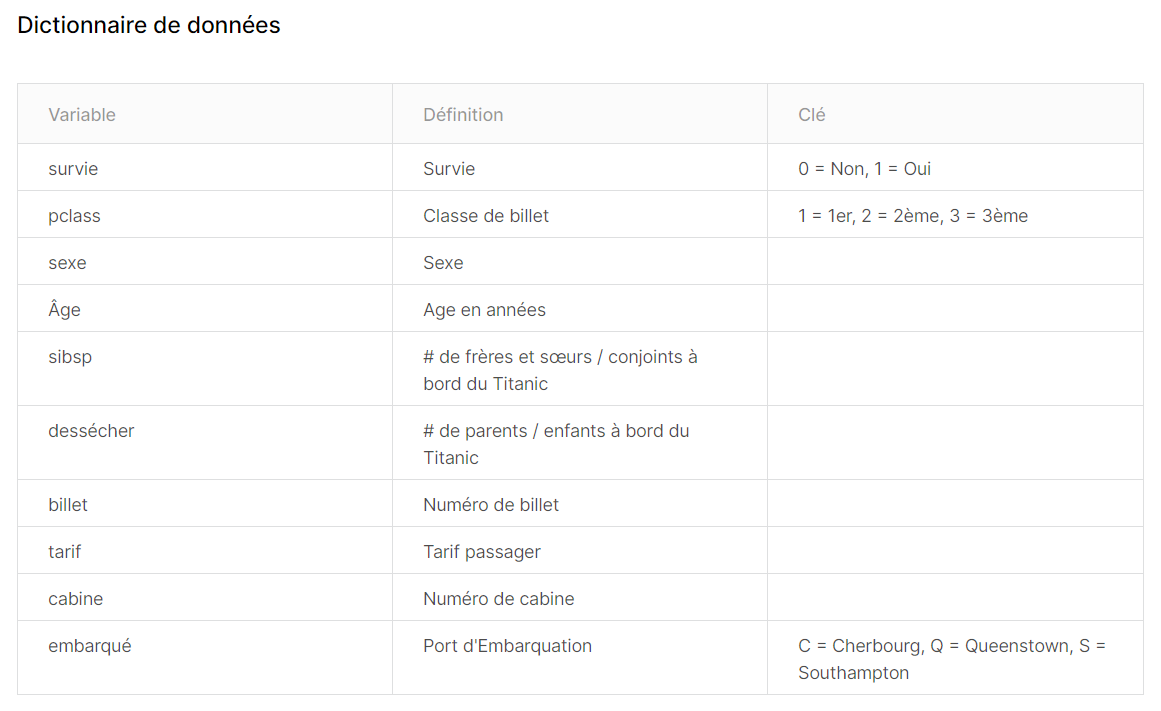

déssécher = parch, ticket = billet, tarif = fare

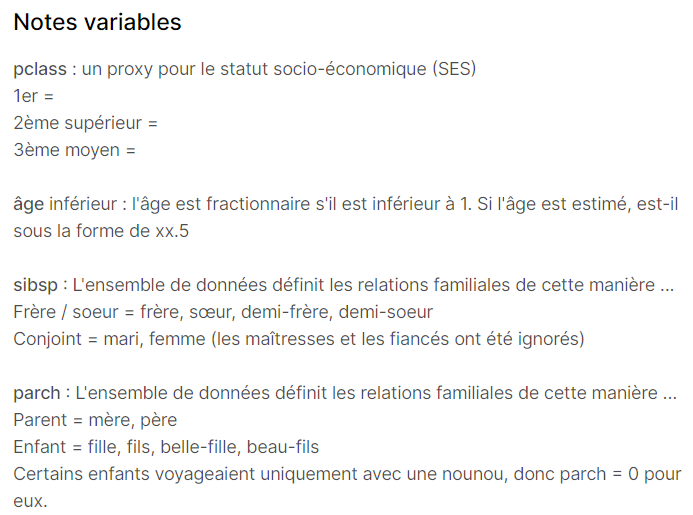

# Data pre-processing

In [3]:
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df_gender.info() #aucune valeur null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [7]:
df_test.info() #il y ' a des valeurs manquantes pour l'age, fare, Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_train.info() #il y ' a des valeurs manquantes pour l'age, Cabin et Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


On met le df_est de coté, on se concentre sur le df_train

### études statistiques

In [9]:
df_train.describe() # Uniquement des variables numériques

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


    - la moyenne de survivant ou non est de 0.383 ce qui rapproche la réalité à plus de mort 
                que de vies.
    - En moyenne, la moyenne des classes fréquentées est largement supérieur à la 2ème classe donc, 
                on a plus de passager entre la 2.3 et la 3è classse
    - L'age : 
                a) moyen des passagers était de 29.6 ans, 
                b) l'écart qui existe entre tous les autres ages et l'age moyen est de 14.5 ans 
                c) le plus jeune passager avait quelques mois (0.42 ans)
                d) le plus vieux passager avait 80 ans
    - Les tarifs :
                a) Le tarif moyen était de 32.2 livres
                b) L'écart type entre chaque tarif et le tarif moyen était de 49.6 livres
                c) Le tarif minimal était de zro (certainement le cas des bébés, des enfants d'un 
                   certain âge, etc.)
                d) Le tarif le plus haut était de 512.32 livre.

Histogramme des variables numériques

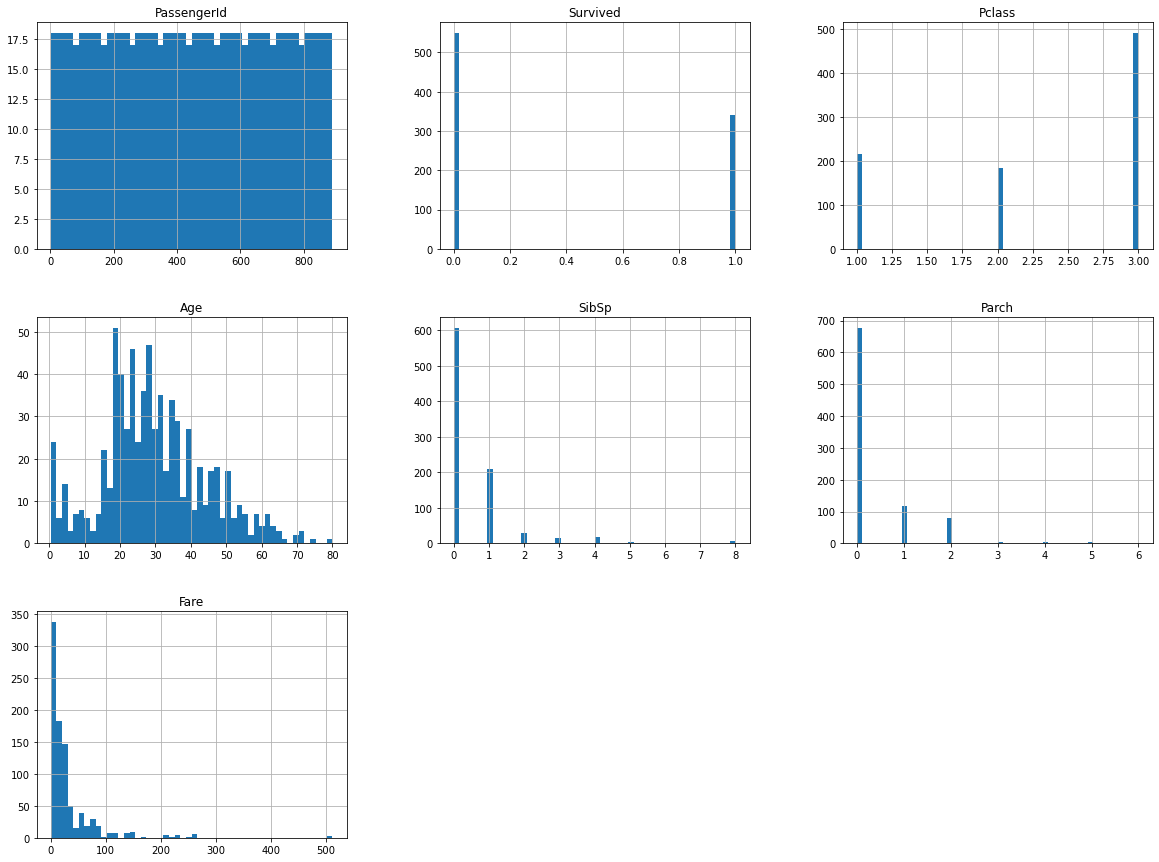

In [10]:
%matplotlib inline
df_train.hist(bins=50, figsize=(20,15))
plt.show()

Constat :

    1) Le PassangerId suit une loi uniforme ça veut dire que les valeurs de cette variable évolue de de façon crissantes
    2) Le Survived suit une loi Binomiale car les valeurs ne sont comprises que entre 0 et 1, un individu qui survie au naufrage a l'indice 1, 0 sinon.
    3) Le Pclass 
    4) L'age suit une loi normale sauf que ici, elle est très asymétrique à gauche il existe donc plusieurs valeurs supérieur à l'age moyenne et très peu qui sont inférieurs
    5) Le SibSp
    6) Le désséchement (Parch)
    7) Le tarif (Fare) 

### Recherche des corrélations

array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='

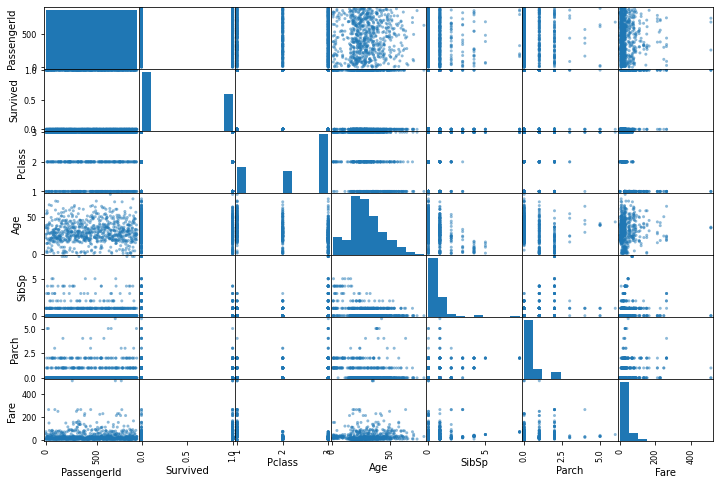

In [11]:
attributes = ["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare"]
pd.plotting.scatter_matrix(df_train[attributes], figsize=(12,8))

#### Connaîtres les valeurs disctincts des variables

## On peut s'intérresser aux éléments suivants :
    
    - Pclass : les individus qui ont le plus survécu sont de quelles classes ? ou encore ceux qui, 
               sont mort ?
    - Sex : pour savoir si ce sont les hommes ou les femmes qui sont le plus morts ou vivant ?
    - Age : les survivants ou non, Sont-ils en grande partie majeurs ou mineurs ?
    - Embarked : Le plus d'emmbarquement a eu lieu où ? les survivent sont en majorité d'où ? les 
                 morts sont en majorités d'où ?
    - Survived : Y'a-t-il plus de survivant que de non survivant ? Prédire le test data, découvrir de 
                 nouvelles informations 

### les individus qui ont le plus survécu sont de quelles classes ?

In [12]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Il y'avait plus de 3 ème classe, 2 ème classe et moins de 1 ère classe.

In [13]:
IndividusC3 = df_train[df_train.Pclass==3]
SurvivantsC3 = IndividusC3[IndividusC3.Survived==1]
SurvivantsC3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 2 to 875
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  119 non-null    int64  
 1   Survived     119 non-null    int64  
 2   Pclass       119 non-null    int64  
 3   Name         119 non-null    object 
 4   Sex          119 non-null    object 
 5   Age          85 non-null     float64
 6   SibSp        119 non-null    int64  
 7   Parch        119 non-null    int64  
 8   Ticket       119 non-null    object 
 9   Fare         119 non-null    float64
 10  Cabin        6 non-null      object 
 11  Embarked     119 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 12.1+ KB


Dans nos données d'entraînement il n'y avait que 119 personnes ayant reservés une place en Trosiième (3e) classe qui ont pu survivre.

In [14]:
IndividusC3.Sex.value_counts()

male      347
female    144
Name: Sex, dtype: int64

In [15]:
SurvivantsC3.Sex.value_counts()

female    72
male      47
Name: Sex, dtype: int64

On peut conclure que, sur 491 individus de la 3 ème classes, il n'y a que 119 ont survécu,  les hommes de la 3e classes ont moins survécu que les femmes en raisons de 47 survivants face à 72 surviventes respectivement.

In [16]:
IndividusC2 = df_train[df_train.Pclass==2]
SurvivantsC2 = IndividusC2[IndividusC2.Survived==1]
SurvivantsC2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 9 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Survived     87 non-null     int64  
 2   Pclass       87 non-null     int64  
 3   Name         87 non-null     object 
 4   Sex          87 non-null     object 
 5   Age          83 non-null     float64
 6   SibSp        87 non-null     int64  
 7   Parch        87 non-null     int64  
 8   Ticket       87 non-null     object 
 9   Fare         87 non-null     float64
 10  Cabin        13 non-null     object 
 11  Embarked     87 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 8.8+ KB


87 individus de la 2ème classe ont survécus, 

In [17]:
IndividusC2.Sex.value_counts()

male      108
female     76
Name: Sex, dtype: int64

In [18]:
SurvivantsC2.Sex.value_counts()

female    70
male      17
Name: Sex, dtype: int64

In [19]:
(87*100)/184

47.28260869565217

Sur 184 Individus de la classe 2,  87 ont survécus soit 47.2% des individus de la classe 2, ici aussi il y'a moins d'hommes que de femmes qui ont survécu soit 17 survivants contre 70 survivantes respectivements.

In [20]:
IndividusC1 = df_train[df_train.Pclass==1]
SurvivantsC1 = IndividusC1[IndividusC1.Survived==1]
SurvivantsC1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  136 non-null    int64  
 1   Survived     136 non-null    int64  
 2   Pclass       136 non-null    int64  
 3   Name         136 non-null    object 
 4   Sex          136 non-null    object 
 5   Age          122 non-null    float64
 6   SibSp        136 non-null    int64  
 7   Parch        136 non-null    int64  
 8   Ticket       136 non-null    object 
 9   Fare         136 non-null    float64
 10  Cabin        117 non-null    object 
 11  Embarked     134 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 13.8+ KB


In [21]:
IndividusC1.Sex.value_counts()

male      122
female     94
Name: Sex, dtype: int64

In [22]:
SurvivantsC1.Sex.value_counts()

female    91
male      45
Name: Sex, dtype: int64

Sur 216 Individus de la classe 2, 136 ont survécus, ici aussi il y'a moins d'hommes que de femmes qui ont survécu soit 45 survivants contre 91 survivantes respectivements.

##### En conclusion :

Les individus de la première classe du naufrage du Titanic dans ce jeu d'entrainement, ont plus survient que les autres. En effet, sur 119+136+87=342 individus qui ont survécus, il y'a la première classe en première position, la trosième classe, suivit de la deuxième classe.

Dans les trois classes, les femmes ont plus survécue que les hommes alors que le nombre d'hommes était de loin supérieur au nombre de femmes.

### les survivants ou non, Sont-ils en grande partie majeurs ou mineurs ?

In [23]:
len(SurvivantsC1[SurvivantsC1.Age>=18])

111

In [24]:
len(SurvivantsC2[SurvivantsC2.Age>=18])

62

In [25]:
len(SurvivantsC3[SurvivantsC3.Age>=18])

56

##### En conclusion :

    Dans la première classe, ce sont les adultes qui ont survécu le plus
    Dans la deuxième classe, ce sont les mineurs qui ont survécu le plus
    Dans la troisième classe, ce sont les adultes qui ont survécu le plus
    
Donc en bref, les majeurs ont lus survécus que les mineurs.

### Où ont eu lieu le plius d'embarquement

In [26]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

le plus d'embarquement dans l'ordre ci-après : Southampton, Cherbourg, Queenstown

###  Echelle : supprimer la colonne Cabine, les lignes du DF qui possède des 'NaN' à la colonne de l'age et Embarked.

nous allons supprimer les cabines car il y'a trop d'information manquantes et de ce fait, on ne peut pas se proposer de les remplacer par des valeurs médianes, moyennes, etc.

In [27]:
df_train_final = df_train.drop(["Cabin"], axis=1)
df_train_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Ensuite supprimer les lignes  des occurences n'ayant aucune valeurs au niveau de l'age.

In [28]:
df_train_final.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [29]:
df_train_final.Age[888]

nan

In [30]:
df_train_final.Age=df_train_final.Age.astype("float64")

In [31]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
ListeIndex=df_train_final[df_train_final.Age.isna()].index

In [33]:
ListeIndex

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [34]:
df_train_final.drop(ListeIndex, inplace=True)

In [35]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


In [36]:
ListeIndexE=df_train_final[df_train_final.Embarked.isna()].index

In [37]:
ListeIndexE

Int64Index([61, 829], dtype='int64')

In [38]:
df_train_final.drop(ListeIndexE, inplace=True)

In [39]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [40]:
df_train_final.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


###  Préparer le df_test :

In [41]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Construction du modèle et entraînement

#### Dans la suite, je teste 13 modèle de classification pour prédire les classes et, afin de retenir le meilleur modèle qui me permetra de prédire convenablement...un bon modèle me donnera sans doute un score de 100%

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier

In [212]:
def TrainLinearModelSGDRClass(df):
    modele = SGDClassifier(max_iter=900, eta0=0.001, loss='log')
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [274]:
result = TrainLinearModelSGDRClass(df_train_final)

le score de ce modèle est de : 69.52247191011236 %


In [297]:
"le modèle est : "+str(result)

"le modèle est : SGDClassifier(eta0=0.001, loss='log', max_iter=900)"

In [298]:
model1 = result

In [275]:
def Train_Naives_Bayes(df):
    modele = GaussianNB()
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [276]:
model3=Train_Naives_Bayes(df_train_final)

le score de ce modèle est de : 67.2752808988764 %


In [47]:
def Train_Knn(df):
    modele = KNeighborsClassifier()
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [48]:
model4 = Train_Knn(df_train_final)

le score de ce modèle est de : 75.56179775280899 %


In [277]:
def Train_SVM(df):
    modele = SVC()
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [295]:
model2=Train_SVM(df_train_final)

le score de ce modèle est de : 65.58988764044943 %


In [279]:
def Train_SVM_lin(df):
    modele = SVC(kernel='linear', C=0.001)
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [280]:
model5 = Train_SVM_lin(df_train_final)

le score de ce modèle est de : 66.01123595505618 %


In [281]:
def Train_SVM_sig(df):
    modele = SVC(kernel='sigmoid', C=0.001)
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [282]:
model6 = Train_SVM_sig(df_train_final)

le score de ce modèle est de : 59.55056179775281 %


In [283]:
def Train_Log_reg(df):
    modele = LogisticRegression(random_state=0, max_iter=10000, C=1)
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [284]:
model7 = Train_Log_reg(df_train_final)

le score de ce modèle est de : 70.64606741573034 %


In [285]:
def Train_Log_reg_CV(df):
    modele = LogisticRegressionCV(cv=5,max_iter=1000, random_state=0)
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [286]:
model8 = Train_Log_reg_CV(df_train_final)

le score de ce modèle est de : 71.06741573033707 %


In [287]:
def Train_DecisionT_reg(df):
    modele = DecisionTreeRegressor()
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [288]:
model9 = Train_DecisionT_reg(df_train_final)

le score de ce modèle est de : 100.0 %


In [289]:
def Train_DecisionT_C(df):
    modele = DecisionTreeClassifier()
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [290]:
model10 = Train_DecisionT_C(df_train_final)

le score de ce modèle est de : 100.0 %


In [291]:
def Train_RFR(df):
    modele = RandomForestRegressor(random_state=0)
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [292]:
model11 = Train_RFR(df_train_final)

le score de ce modèle est de : 88.60328878406709 %


In [293]:
def Train_RFC(df):
    modele = RandomForestClassifier(random_state=0)
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele

In [294]:
model12 = Train_RFC(df_train_final)

le score de ce modèle est de : 100.0 %


##### Recherche de l'hyper paramètre

In [147]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(df_train_final.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) , df_train_final.Survived)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    #print("Detailed classification report:")
    #print()
    #print("The model is trained on the full development set.")
    #print("The scores are computed on the full evaluation set.")
    #print()
    #y_true, y_pred = y_test, clf.predict(X_test)
    #print(classification_report(y_true, y_pred))
    #print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Grid scores on development set:

0.496 (+/-0.215) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.623 (+/-0.281) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.441 (+/-0.332) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.571 (+/-0.297) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.539 (+/-0.358) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.510 (+/-0.284) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.507 (+/-0.343) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.527 (+/-0.266) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.681 (+/-0.101) for {'C': 1, 'kernel': 'linear'}
0.695 (+/-0.146) for {'C': 10, 'kernel': 'linear'}
0.710 (+/-0.155) for {'C': 100, 'kernel': 'linear'}
0.703 (+/-0.157) for {'C': 1000, 'kernel': 'linear'}

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid 

##### Meilleur modèle SVM

    En partant des résultats obtenus dans la cellule précédente, on peut constater que le meilleur hyper paramètre est égale à 100 : 
    
    {'C': 100, 'kernel': 'linear'} et,
    
    {'C': 1, 'kernel': 'linear'}
    
    Et c'est ce que nous allons faire ci-dessous, en utiliisant à la fois notre meilleur modèle svm qui utilise un noyau linéaire nous allons remplacer la valeur du paramètre C=0.001 par C=100 puis, par 1.

In [49]:
def Train_SVM_lin2(df, params):
    modele = SVC(kernel='linear', C=params)
    X = df.drop(["Survived","Name", "Sex", "Ticket", "Embarked" ], axis=1) #Features
    y = df.Survived  #Target
    modele.fit(X,y)
    resultat=modele.score(X,y)
    print("le score de ce modèle est de : "+ str(resultat*100)+" %")
    return modele     

In [50]:
model13 = Train_SVM_lin2(df_train_final,100)

le score de ce modèle est de : 68.1179775280899 %


In [51]:
model14 = Train_SVM_lin2(df_train_final,1)

le score de ce modèle est de : 70.50561797752809 %


L'hyper paramètre C = 1 est le meilleur pour le modèle SVM.

### Conclusion sur le choix du modèle

Il est clair que nous nous pencherons sur les modèles qui nous donnent un score de 100% :

    - Decision Tree Regression
    - Random Forest Classifier
    - Decision Tree Classifier
    
Ensuite, viens les autres dans l'ordre des scores :

    - Random Forest Regression 88.6%
    - K-nearest neighbors 75.5%
    - Logistic Regression 5-CV 71.06%
    - Logistic Regression 70.6%
    - Support Vector Machine  (SVC, C=1, Kernel='linear') 70.5%
    - SGD Classifier (eta0=0.001, loss='log', max_iter=900) 69.5%
    - Support Vector Machine (SVC, C=100, Kernel='linear) 68.1%
    - Naives Bayes 67.2%
    - SVM (SVC, kernel='linear', C=0.001) 66.01%
    - SVM (SVC) 65.5%
    - SVM (SVC, kernel='sigmoid', C=0.001) 59.5%

Le choix est ainsi porté sur les modèles suivant afin de prévenir des potentiels cas de grandes variances et biais qui sont des anomalies :

- le modèle Decision Tree Class, (100%) : model10
- Random Forest Regressor et,  (88.6%) : model11
- K-nearest neighbors. (75.5%) : model4
- SVM SVC (70.5%) : model14

## J'aurais aussi pu gérer l'aspect variable qualitative Sex en (0,1)=(F,M)

Si transofrmation 1 (LabelEncoder) : 

    utiliser un simple "encoder de Label<encoder" donnera l'impression à des algo comme Knn qu'il y a plus de lien (similarité) entre deux valeurs plus proches que deux valeurs éloignés lorsque nous sommes dans un context de 3 genres (1 male,2 femal,3 bi) alors que dans notre contexte, on qualifie de 0 une femme et 1 un homme, ce qui n'a rien à voir avec le principe des distances.

Si transofrmation 2 (LabelBinarize) : 

    on peut alors utiliser un simple "codage disjonctif : LabelBinarizer" qui consitera à attribuer une valeur (1 ou 0) selon que un enregistrement du DataSet est égal à 1 ou à 0. Sans comparer mais en comprenant que c'est une affaire de catégorie.

Du coup pour faire simple, en plus d'avoir un pipline pour les valeurs quantitatives, on peut aussi à la fois faire un pipline e,n utilisant un FeatureUnion pour les valeurs qualitatives...
Pour ça il faut :
- DataFrameSelector
- FeatureUnion
- SimpleImputer
- CombineAttributesAdder
- StandardScaler
- CustomLabelBinarizer
- num_attribs = ["df.drop["NomDesColonnesDontIlEstQuestion",axis=1]"]
- cat_attribs = ["NomDesColonnesDontIlEstQuestion"]

###  Nettoyons le DF_Test

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### Enlever Name, Sex, Ticket, Cabin, Embarked

In [53]:
df_test_final = df_test.drop(["Name", "Sex", "Ticket", "Cabin", "Embarked"],axis=1)

##### Enlever les occurances ayant nan sur Age

In [54]:
ListeIndexTest=df_test_final[df_test_final.Age.isna()].index

In [55]:
ListeIndexTest

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [56]:
df_test_final.drop(ListeIndexTest, inplace=True)

In [57]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  332 non-null    int64  
 1   Pclass       332 non-null    int64  
 2   Age          332 non-null    float64
 3   SibSp        332 non-null    int64  
 4   Parch        332 non-null    int64  
 5   Fare         331 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 18.2 KB


##### Enlever une occurance ayant nan sur Fare

In [58]:
ListeIndexTest2 = df_test_final[df_test_final.Fare.isna()].index

In [59]:
df_test_final.drop(ListeIndexTest2, inplace=True)

In [60]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Age          331 non-null    float64
 3   SibSp        331 non-null    int64  
 4   Parch        331 non-null    int64  
 5   Fare         331 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 18.1 KB


##### On enlève aussi sur le df_genre, les occurances associés aux Fare et aux Ages manquants

In [151]:
df_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [149]:
df_gender_final = df_gender.copy()

In [150]:
df_gender_final.drop(ListeIndexTest, inplace=True)

In [152]:
df_gender_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  332 non-null    int64
 1   Survived     332 non-null    int64
dtypes: int64(2)
memory usage: 7.8 KB


In [153]:
df_gender_final.drop(ListeIndexTest2, inplace=True)

In [154]:
df_gender_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  331 non-null    int64
 1   Survived     331 non-null    int64
dtypes: int64(2)
memory usage: 7.8 KB


Maintenanons que nous avons de part et d'autre le même nombre de ligne, nous pouvons effectuer des oppérations simultanément sur eux!

##### Observer le df test

In [81]:
pd.set_option('display.min_rows', None)np.

In [82]:
df_test_final.isnull()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [90]:
np.where(np.isnan(df_test_final)) #obtenir un tuple i,j qui correspond aux cases où il y a des vides

(array([], dtype=int64), array([], dtype=int64))

In [91]:
np.nan_to_num(df_test_final) #remplacer les valeurs NaN par 0

array([[8.9200e+02, 3.0000e+00, 3.4500e+01, 0.0000e+00, 0.0000e+00,
        7.8292e+00],
       [8.9300e+02, 3.0000e+00, 4.7000e+01, 1.0000e+00, 0.0000e+00,
        7.0000e+00],
       [8.9400e+02, 2.0000e+00, 6.2000e+01, 0.0000e+00, 0.0000e+00,
        9.6875e+00],
       ...,
       [1.3040e+03, 3.0000e+00, 2.8000e+01, 0.0000e+00, 0.0000e+00,
        7.7750e+00],
       [1.3060e+03, 1.0000e+00, 3.9000e+01, 0.0000e+00, 0.0000e+00,
        1.0890e+02],
       [1.3070e+03, 3.0000e+00, 3.8500e+01, 0.0000e+00, 0.0000e+00,
        7.2500e+00]])

In [92]:
pd.DataFrame(df_test_final).fillna(0) #remplacer les valeurs NaN par 0 ou par X_test.fillna(X_test.mean()) la valeur mayenne

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.50,0,0,7.8292
1,893,3,47.00,1,0,7.0000
2,894,2,62.00,0,0,9.6875
3,895,3,27.00,0,0,8.6625
4,896,3,22.00,1,1,12.2875
5,897,3,14.00,0,0,9.2250
6,898,3,30.00,0,0,7.6292
7,899,2,26.00,1,1,29.0000
8,900,3,18.00,0,0,7.2292
9,901,3,21.00,2,0,24.1500


In [83]:
df_test_final

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.50,0,0,7.8292
1,893,3,47.00,1,0,7.0000
2,894,2,62.00,0,0,9.6875
3,895,3,27.00,0,0,8.6625
4,896,3,22.00,1,1,12.2875
5,897,3,14.00,0,0,9.2250
6,898,3,30.00,0,0,7.6292
7,899,2,26.00,1,1,29.0000
8,900,3,18.00,0,0,7.2292
9,901,3,21.00,2,0,24.1500


In [93]:
df_test_final[df_test_final==np.inf]=np.nan
df_test_final.fillna(0, inplace=True)

### En bref notre classe predictive

In [207]:
class Prediction_ML:
    
    def test_data_seg(df__test,df_reality):
        #X_test = df__test.drop(["Name", "Sex", "Ticket", "Embarked", "Cabin" ], axis=1) #Features
        X_test = df__test
        y_test = df_reality.Survived  #Target
        return X_test,y_test
    
    def prediction(X_test, model):
        return model.predict(X_test)
    
    def prediction(X_test, model):
        return model.predict(X_test)
    
    def evaluation_validation(model, X_test, y_test, predictions):
        realite = y_test

        performance = accuracy_score(realite, predictions)*100
        precision = precision_score(realite, predictions)*100
        rappel = recall_score(realite, predictions)*100
        f1 = f1_score(realite, predictions)*100

        class_names = ['Ont survécu', 'N\'ont pas survécu']
        c_m=plot_confusion_matrix(model,X_test,realite,display_labels=class_names,
                                     cmap=plt.cm.YlOrRd_r)
        cm = pd.DataFrame(c_m,columns=["Realite positive","Realite Negative"],index=["Prediction positive","Prediction négative"])


        print("le taux de bonne classification est de : "+str(performance),'%')
        print("la précision est : "+str(precision),'%')
        print("le rappel est : "+str(rappel),'%')
        print("le taux du f1 score est de : "+str(f1),'%')
        c_m.ax_.set_title('Matrice de confusion')
        plt.show()
        
        
    def predire(df, model):
        X_test, y_test = test_data_seg(df, df_gender_final)
        lesPredicitons = prediction(X_test, model)
        evaluation_validation(model, X_test,y_test,lesPredicitons)

# A moi de jouer : 

##### Ce que nous renseignes les scores (mésures ou metrics en anglais) :

        - accuracy : il donne le taux de bonne classification
        - precision : Nous permet de connaître le taux de personnes ayant survécu, combien ont été réellement trouvé?
        - recall : Parmis les personnes ayant survécu, combien ont été trouvé ?
        
        
        c'est le compris entre les mesures : On veut un modèle qui déterminer tous les cas positif c'est à dire, bon rappel et précision
        
        
        On va aussi tenir compte du nombre de non détéction (qui est le plus dangereux) et du nombre de fausse alarmes (qui est le moins dangereux). après, tout dépendant du context.

## Passons à l'action, évaluons notre système sur le jeu de test

###### model 10 : Décision Tree

le taux de bonne classification est de : 60.72507552870091 %
la précision est : 49.101796407185624 %
le rappel est : 64.56692913385827 %
le taux du f1 score est de : 55.782312925170075 %


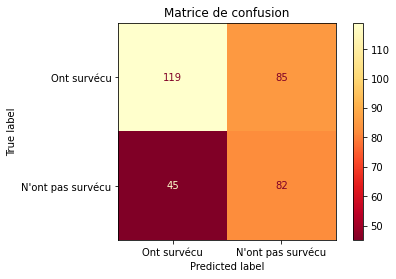

In [208]:
Prediction_ML.predire(df_test_final,model10)

###### model 4 : K-nearst neighbors

le taux de bonne classification est de : 63.141993957703924 %
la précision est : 54.71698113207547 %
le rappel est : 22.83464566929134 %
le taux du f1 score est de : 32.22222222222222 %


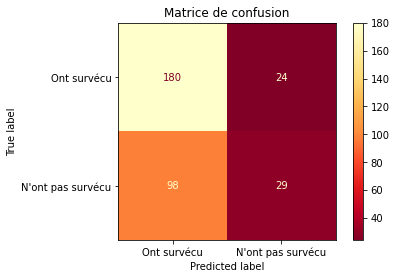

In [210]:
Prediction_ML.predire(df_test_final,model4)

###### model 14 : SVM SVC

le taux de bonne classification est de : 61.027190332326285 %
la précision est : 49.122807017543856 %
le rappel est : 44.09448818897638 %
le taux du f1 score est de : 46.47302904564315 %


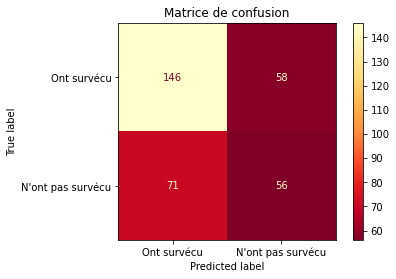

In [211]:
Prediction_ML.predire(df_test_final,model14)

##### Les autres

le taux de bonne classification est de : 61.631419939577036 %
la précision est : 50.0 %
le rappel est : 55.90551181102362 %
le taux du f1 score est de : 52.78810408921933 %


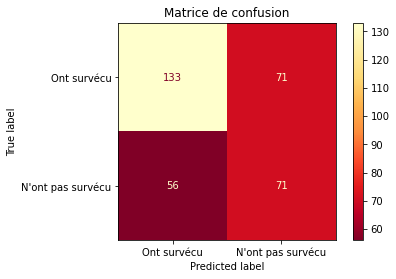

In [299]:
Prediction_ML.predire(df_test_final,model1)

le taux de bonne classification est de : 63.44410876132931 %
la précision est : 65.0 %
le rappel est : 10.236220472440944 %
le taux du f1 score est de : 17.68707482993197 %


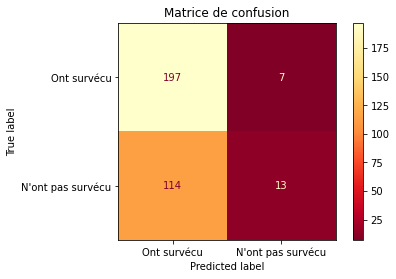

In [300]:
Prediction_ML.predire(df_test_final,model2)

le taux de bonne classification est de : 61.027190332326285 %
la précision est : 48.888888888888886 %
le rappel est : 34.645669291338585 %
le taux du f1 score est de : 40.55299539170507 %


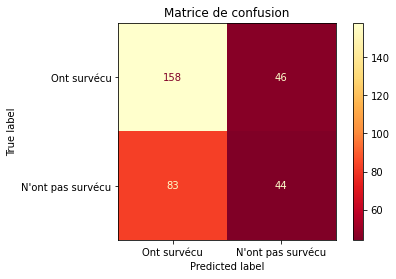

In [301]:
Prediction_ML.predire(df_test_final,model3)

le taux de bonne classification est de : 63.141993957703924 %
la précision est : 54.385964912280706 %
le rappel est : 24.409448818897637 %
le taux du f1 score est de : 33.69565217391305 %


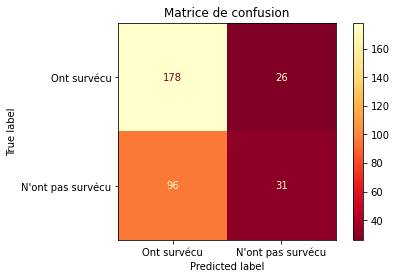

In [302]:
Prediction_ML.predire(df_test_final,model5)

le taux de bonne classification est de : 61.631419939577036 %
la précision est : 0.0 %
le rappel est : 0.0 %
le taux du f1 score est de : 0.0 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


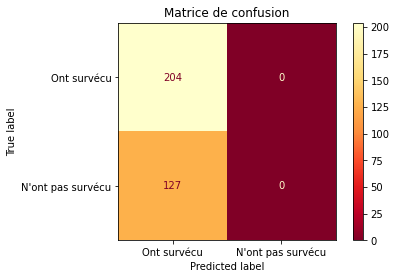

In [310]:
Prediction_ML.predire(df_test_final,model6)

le taux de bonne classification est de : 58.610271903323266 %
la précision est : 46.32352941176471 %
le rappel est : 49.60629921259843 %
le taux du f1 score est de : 47.908745247148296 %


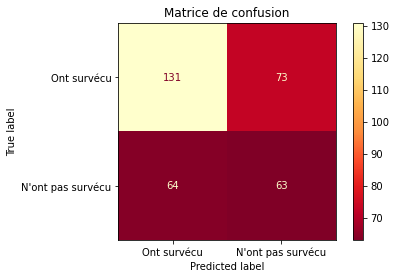

In [304]:
Prediction_ML.predire(df_test_final,model7)

le taux de bonne classification est de : 58.30815709969789 %
la précision est : 45.98540145985402 %
le rappel est : 49.60629921259843 %
le taux du f1 score est de : 47.72727272727273 %


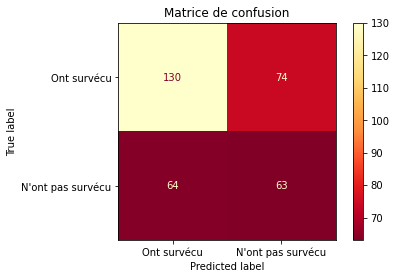

In [305]:
Prediction_ML.predire(df_test_final,model8)

le taux de bonne classification est de : 62.839879154078545 %
la précision est : 51.35135135135135 %
le rappel est : 59.84251968503938 %
le taux du f1 score est de : 55.27272727272729 %


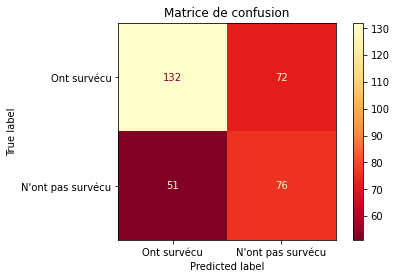

In [307]:
Prediction_ML.predire(df_test_final,model12)

le taux de bonne classification est de : 61.027190332326285 %
la précision est : 48.888888888888886 %
le rappel est : 34.645669291338585 %
le taux du f1 score est de : 40.55299539170507 %


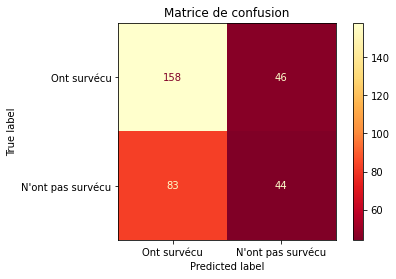

In [308]:
Prediction_ML.predire(df_test_final,model3)

# ALTE, ERREUR :  

### Ces 2 modèles  RFR & DTR ne passe pas car ce sont des modèle de predicition par regression linéaire et non des modèles de classifiactions, en bref, c'est une erreur de vouloir utiliser des metrics de classification avec des metreiques de regressions.

###### model 9 : Décision Tree Reg

In [ ]:
Prediction_ML.predire(df_test_final,model9)

###### model 11 : Random Forest Regressor

In [ ]:
Prediction_ML.predire(df_test_final,model11)

# Brouillon : dans la cuisine

In [156]:
X_test, y_test = test_data_seg(df_test_final, df_gender_final)

In [157]:
lesPredicitons = model10.predict(X_test)

In [158]:
lesPredicitons

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [159]:
realite=np.array(y_test)
realite

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [161]:
accuracy_score(realite,lesPredicitons)*100

60.72507552870091